# Prediction using Decision Tree  Algorithm : 



# Importing required libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn import tree

# reading iris dataset

In [8]:
data = pd.read_csv('C:\iris.csv')
iris_data = data.copy()
iris_data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# checking for null values

In [9]:
iris_data.isnull().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

# understanding the data

In [10]:
iris_data.shape

(150, 5)

In [11]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
iris_data.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# correlation matrix

In [14]:
iris_data.corr()

,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,1.000000,-0.109369,0.871754,0.817954
SepalWidth,-0.109369,1.000000,-0.420516,-0.356544
PetalLength,0.871754,-0.420516,1.000000,0.962757
PetalWidth,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

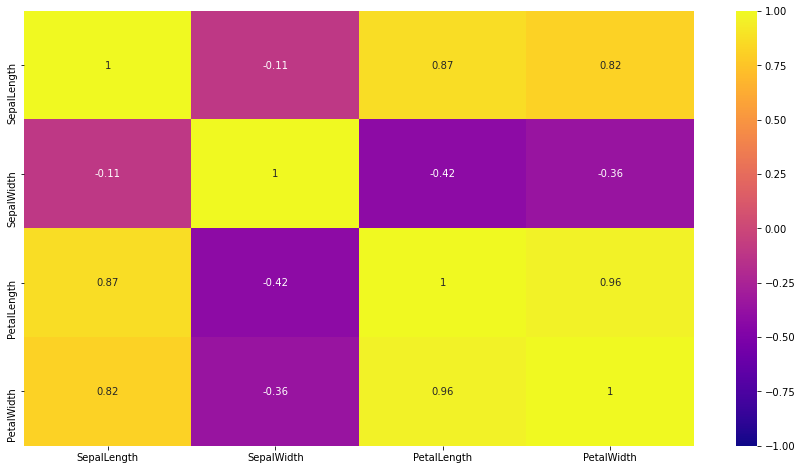

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(iris_data.corr(),annot=True,vmin=-1,vmax=1,cmap='plasma')

# Observation
# PetalLength and PetalWidth : Corr 0.96 : Having highest correlation
# PetalLength and SepalLenght : Corr 0.87 : Having second highest correlation
# PetalWidth and SepalLenght : Corr 0.82 : Having fair enough correlation

# in the above figure, we can see that sepallength and sepalwidth are not correlated,
# while the petallength and petalwidth are highly correlated






# data visualization

<Figure size 1440x720 with 0 Axes>

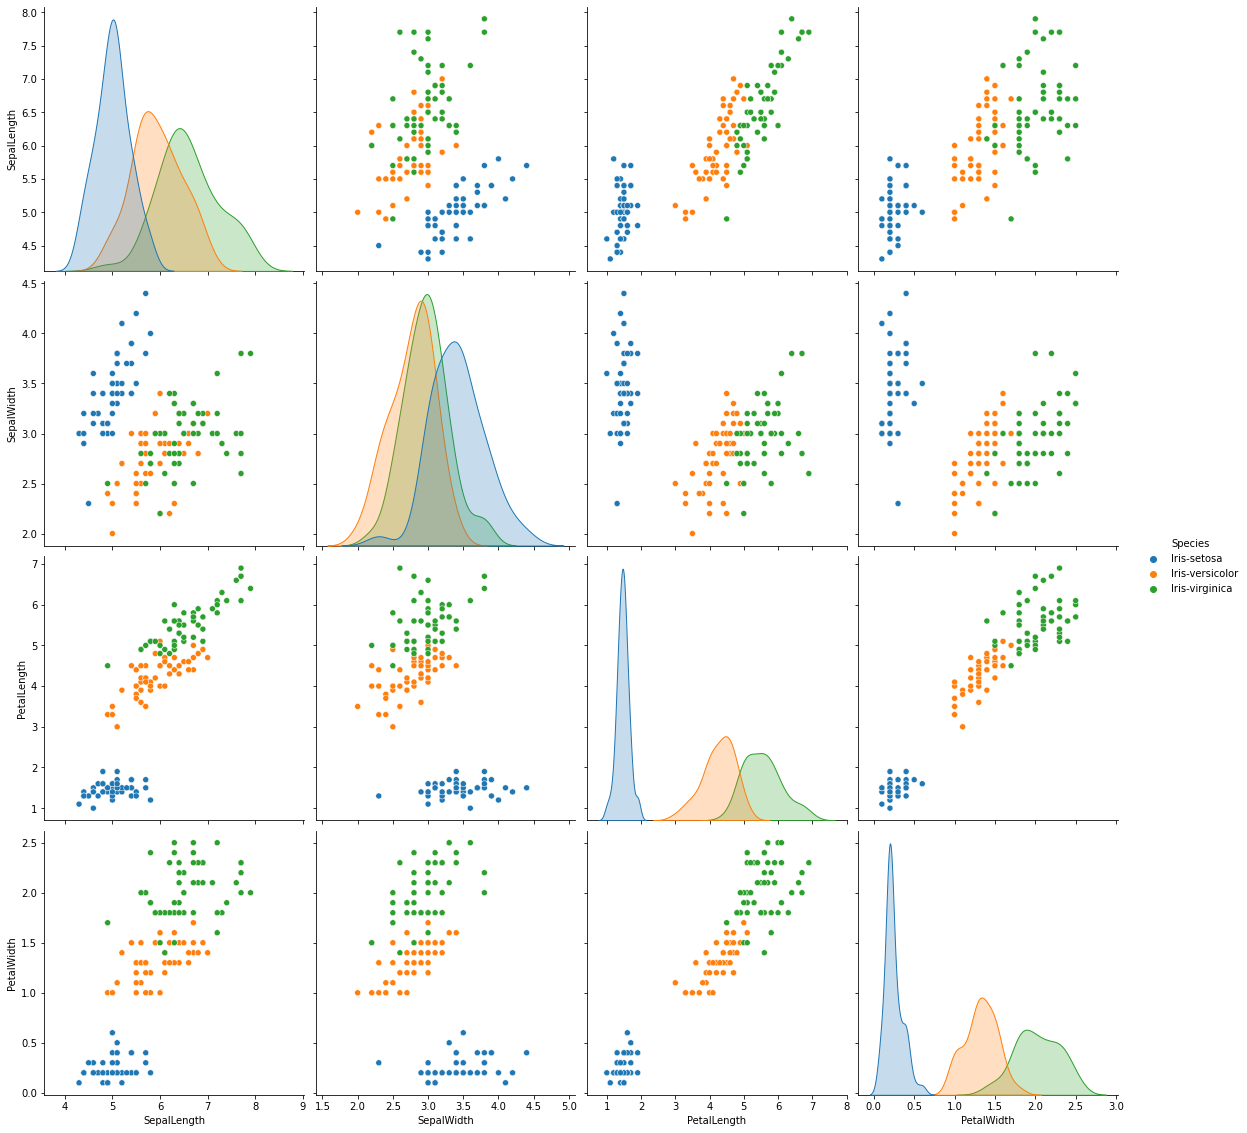

In [17]:
plt.figure(figsize=(20,10))
sns.pairplot(iris_data,hue='Species',height=4)
plt.show()

# Observation
# All type of flowers are well separable for PetalLenght and PetalWidth
# Also all type of bit of well separable for PetalWidth and SepalWidth

# histograms

array([[<AxesSubplot:title={'center':'SepalLength'}>,
        <AxesSubplot:title={'center':'SepalWidth'}>],
       [<AxesSubplot:title={'center':'PetalLength'}>,
        <AxesSubplot:title={'center':'PetalWidth'}>]], dtype=object)

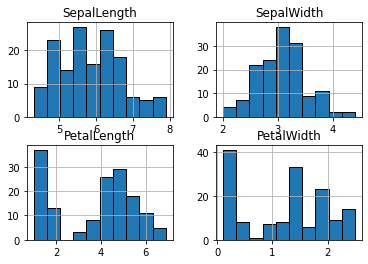

In [19]:
iris_data.hist(edgecolor='black')

# Sepal length between 5.4 and 5.7 has maximum count.
# Sepal Width between 3.0 and 3.3 has maximum count.
# Petals having length between 1 and 1.5 have maximum count.
# Petals having width between 0.1 and 0.4 have maximum count


<AxesSubplot:xlabel='Species', ylabel='PetalWidth'>

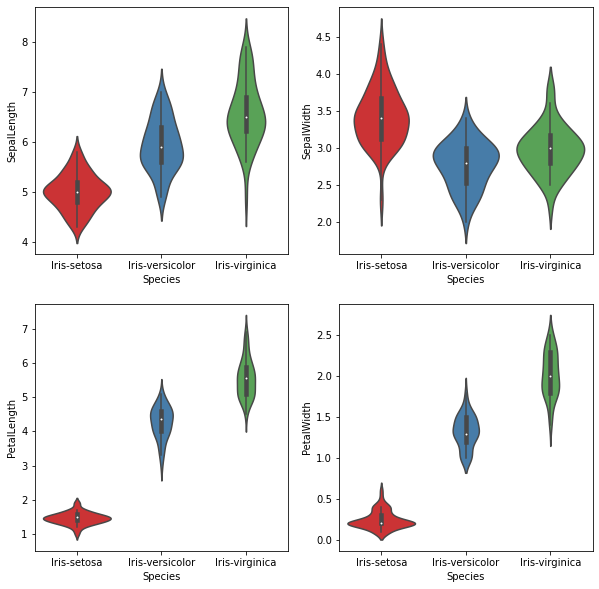

In [23]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
sns.violinplot(data=iris_data, x='Species',y='SepalLength',palette='Set1')
plt.subplot(2,2,2)
sns.violinplot(data=iris_data, x='Species',y='SepalWidth',palette='Set1')

plt.subplot(2,2,3)
sns.violinplot(data=iris_data,x='Species', y='PetalLength',palette='Set1')
plt.subplot(2,2,4)
sns.violinplot(data=iris_data, x='Species', y='PetalWidth',palette='Set1')


# Using train_test_split function to train model


In [21]:
X = iris_data[['SepalLength','SepalWidth','PetalLength','PetalWidth']]
y = iris_data['Species']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

# using decision tree classifier

In [25]:
dec_tree = DecisionTreeClassifier(criterion='gini',random_state=20)
dec_tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=20)

# calculating the model score

In [26]:
model_score = dec_tree.score(X_test,y_test)*100
print('The model score is {}.'.format(np.round(model_score,2)))

The model score is 97.78.


In [28]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [30]:
y_pred = model.predict(X_test)
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [31]:
temp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
temp

,Actual,Predicted
114,Iris-virginica,Iris-virginica
62,Iris-versicolor,Iris-versicolor
33,Iris-setosa,Iris-setosa
107,Iris-virginica,Iris-virginica
7,Iris-setosa,Iris-setosa
100,Iris-virginica,Iris-virginica
40,Iris-setosa,Iris-setosa
86,Iris-versicolor,Iris-versicolor
76,Iris-versicolor,Iris-versicolor
71,Iris-versicolor,Iris-versicolor


# calculating the accuracy of the model

In [32]:
accuracy_score(y_test,y_pred)

0.9777777777777777

# Plotting and Visualizing Decision Tree

In [45]:

features = ['Sepal Length','Sepal Width','Petal Length','Petal Width']
species = iris_data['Species'].unique().tolist()


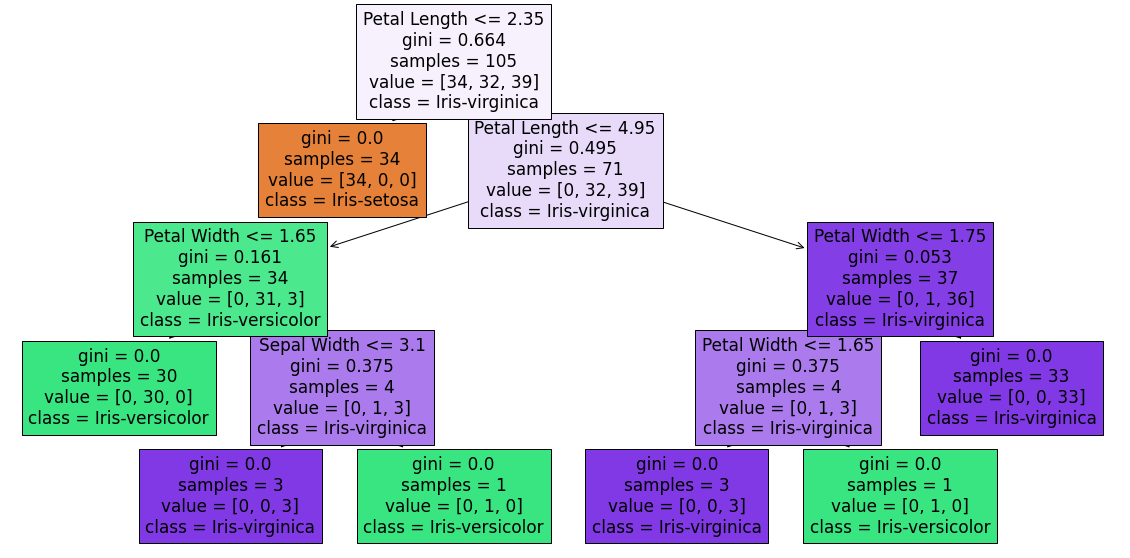

In [46]:
plt.figure(figsize=(20,10))
plot_tree(model,feature_names=features,class_names=species,filled=True)
plt.show()

[Text(133.92000000000002, 195.696, 'Petal length <= 2.35\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]\nclass = Virginica'),
 Text(100.44000000000001, 152.208, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]\nclass = Setosa'),
 Text(167.40000000000003, 152.208, 'Petal length <= 4.95\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]\nclass = Virginica'),
 Text(66.96000000000001, 108.72, 'Petal width <= 1.65\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]\nclass = Versicolor'),
 Text(33.480000000000004, 65.232, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]\nclass = Versicolor'),
 Text(100.44000000000001, 65.232, 'Sepal width <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = Virginica'),
 Text(66.96000000000001, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = Virginica'),
 Text(133.92000000000002, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Versicolor'),
 Text(267.84000000000003, 108.72, 'Petal width <= 1.75\ngini = 0.053\nsamples = 37\nvalue = 

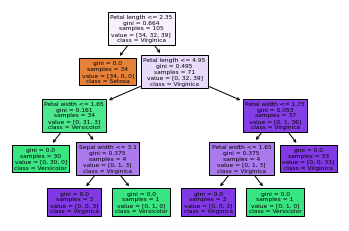

In [47]:
f_n = ["Sepal length", "Sepal width", "Petal length", "Petal width"]
c_n = ["Setosa", "Versicolor", "Virginica"]
plot_tree(model,feature_names = f_n, class_names = c_n , filled = True)